In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [3]:
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', '5849', '0.1',
       'Unnamed: 8', '360', '1', 'Urban', 'Y'],
      dtype='object')

In [5]:
df.rename(columns={'LP001002':'loan_id','Male':'Gender','No':'married','0':'Dependents','Graduate':'Education','No.1':'Self employe',
                 '5849':'Applicant_income','0.1':'Coapplicant_income','Unnamed: 8':'Loan amount','360':'Loan amount term','1':'credit history','Urban':'Property_Area ', 
                  'Y':'Loan_status'},inplace=True)

In [6]:
df.head()

,loan_id,Gender,married,Dependents,Education,Self employe,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history,Property_Area,Loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.



In [7]:
df.shape

(613, 13)

this data set contains 613 rows and 13 columns

There are two types of data(object,float64) is present in this dataset 

In [8]:
df.describe()

,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1.This gives the statistical summary of numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values are present.
2.In this dataset count of  columns are not same,which means there is  missing values are present. 3.The median(50%) is less than mean which means skewness is preset 
4.By summarizing the data there is diff between 75% and max Which means  outliers are present

In [9]:
df.isna().sum()

loan_id                0
Gender                13
married                3
Dependents            15
Education              0
Self employe          32
Applicant_income       0
Coapplicant_income     0
Loan amount           21
Loan amount term      14
credit history        50
Property_Area          0
Loan_status            0
dtype: int64

<Axes: >

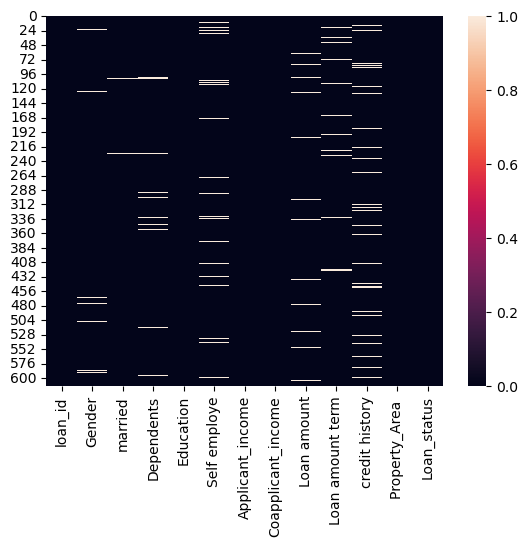

In [10]:
sns.heatmap(df.isna())

We can clearly visualize that null values are present in this data set

In [11]:
#Filling all Nan values with mode of respective variable
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["married"].fillna(df["married"].mode()[0],inplace=True)
df["Self employe"].fillna(df["Self employe"].mode()[0],inplace=True)
df["Loan amount term"].fillna(df["Loan amount term"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["credit history"].fillna(df["credit history"].mode()[0],inplace=True)
df["Loan amount"].fillna(df["Loan amount"].mode()[0],inplace=True)



In [12]:
df.isnull().sum()

loan_id               0
Gender                0
married               0
Dependents            0
Education             0
Self employe          0
Applicant_income      0
Coapplicant_income    0
Loan amount           0
Loan amount term      0
credit history        0
Property_Area         0
Loan_status           0
dtype: int64

<Axes: >

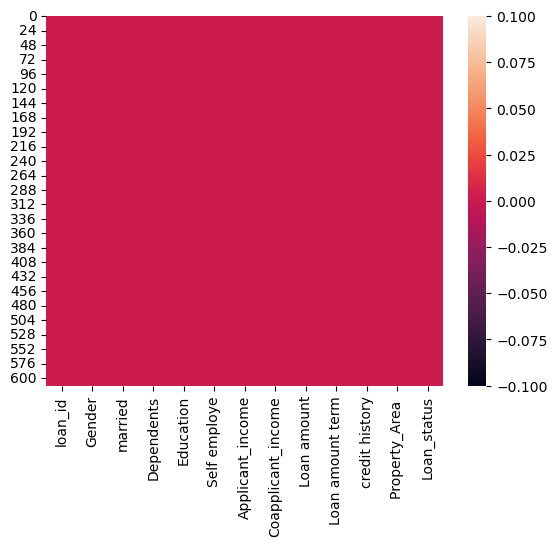

In [13]:
sns.heatmap(df.isnull())

Now,we clearly visualize that there is no null values present

# Statistical analysis

In [14]:
df.describe()

,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,145.507341,342.381729,0.854812
std,6114.004114,2927.903583,84.243415,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,125.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

loan_id
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64


Gender
Male      501
Female    112
Name: count, dtype: int64


married
Yes    401
No     212
Name: count, dtype: int64


Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64


Self employe
No     531
Yes     82
Name: count, dtype: int64


Applicant_income
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64


Coapplicant_income
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan amount
120.0    41
110.0    17
100.0    15
160.0    12
187.0    12
  

In [16]:
df.nunique()

loan_id               613
Gender                  2
married                 2
Dependents              4
Education               2
Self employe            2
Applicant_income      504
Coapplicant_income    287
Loan amount           203
Loan amount term       10
credit history          2
Property_Area           3
Loan_status             2
dtype: int64

In [17]:
df.drop(columns='loan_id',inplace=True)

In [18]:
df.head(2)

,Gender,married,Dependents,Education,Self employe,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history,Property_Area,Loan_status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='count'>

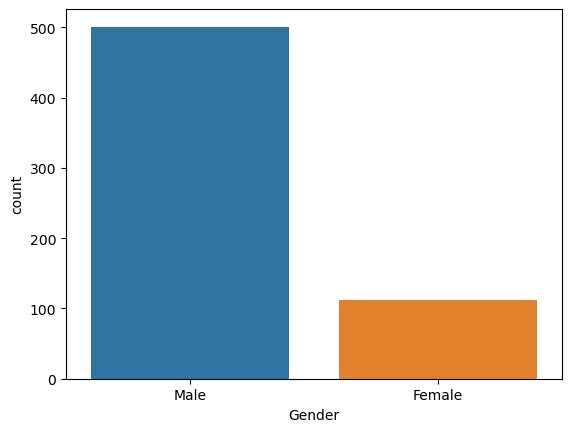

In [19]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

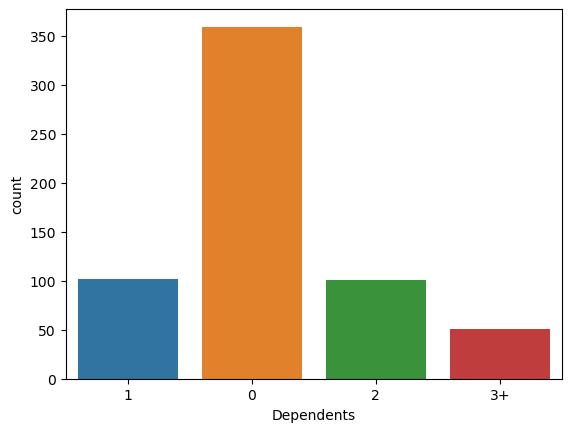

In [20]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

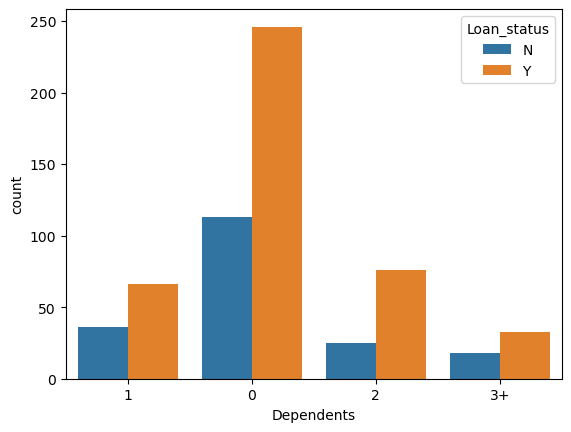

In [21]:
sns.countplot(x='Dependents',hue='Loan_status',data=df)

<Axes: xlabel='Self employe', ylabel='count'>

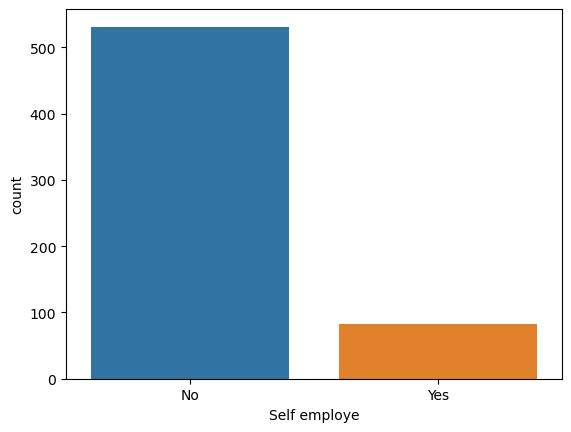

In [22]:
sns.countplot(x='Self employe',data=df)

<Axes: xlabel='Self employe', ylabel='count'>

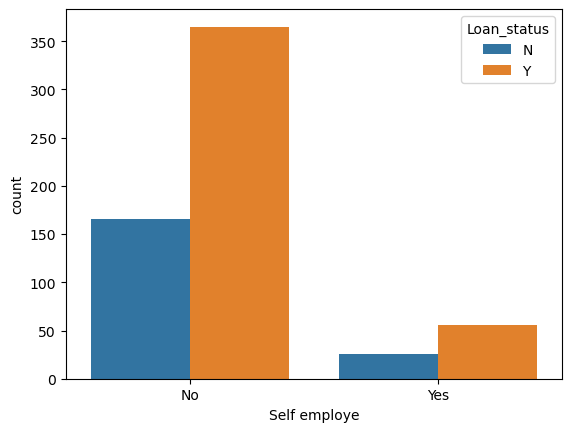

In [23]:
sns.countplot(x='Self employe',hue='Loan_status',data=df)

<Axes: xlabel='married', ylabel='count'>

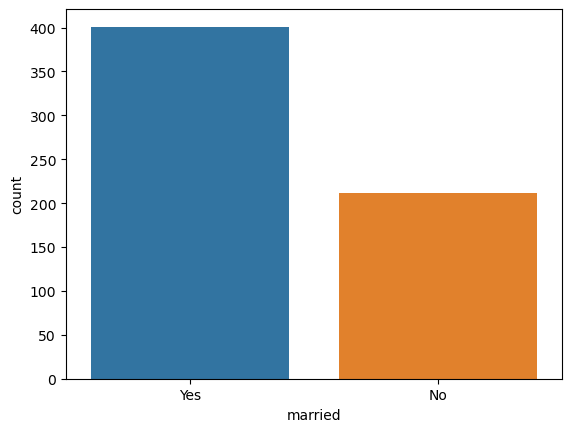

In [24]:
sns.countplot(x='married',data=df)

<Axes: xlabel='Education', ylabel='count'>

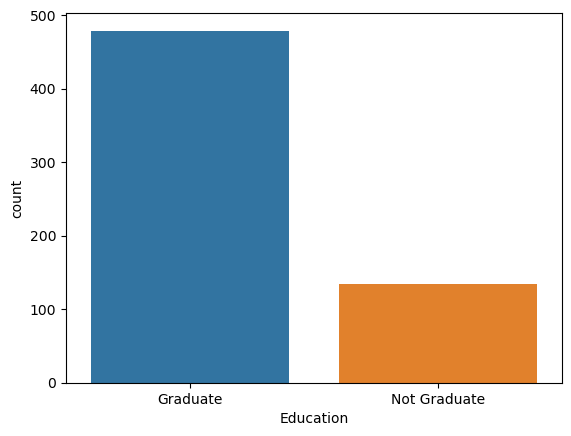

In [25]:
sns.countplot(x='Education',data=df)

<Axes: xlabel='Education', ylabel='count'>

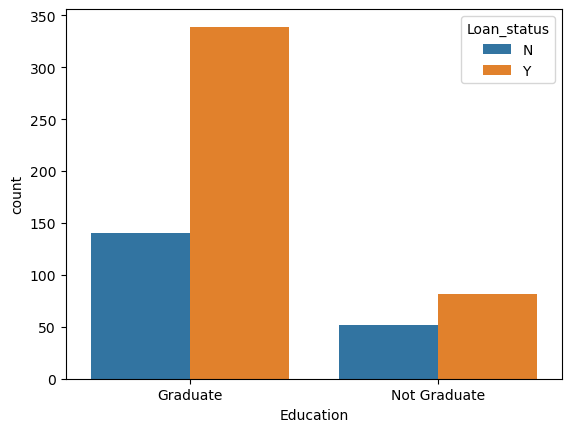

In [26]:
sns.countplot(x='Education',hue='Loan_status',data=df)

In [27]:
df['Loan amount term'].value_counts()

Loan amount term
360.0    525
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: xlabel='Loan amount term', ylabel='count'>

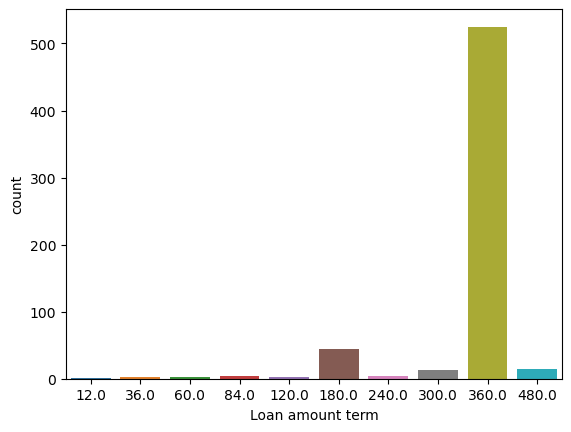

In [28]:
sns.countplot(x='Loan amount term',data=df)

<Axes: xlabel='Applicant_income', ylabel='Loan amount'>

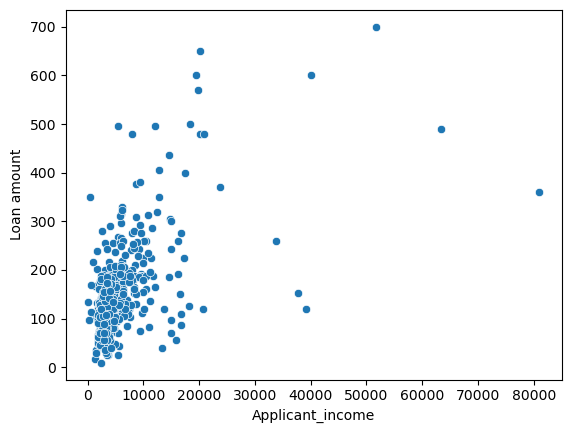

In [29]:
sns.scatterplot(x='Applicant_income',y='Loan amount',data=df)

<Axes: xlabel='Applicant_income', ylabel='Loan_status'>

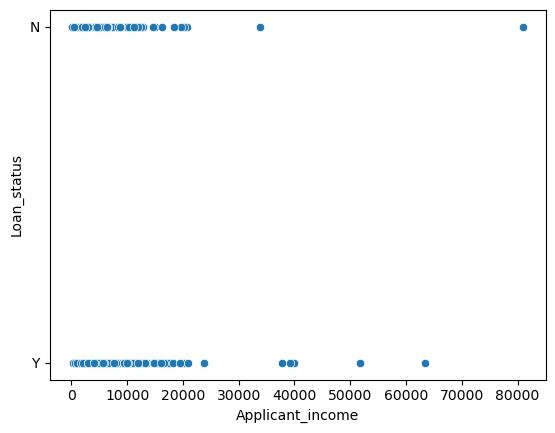

In [30]:
sns.scatterplot(x='Applicant_income',y='Loan_status',data=df)

<Axes: xlabel='Loan amount', ylabel='Loan_status'>

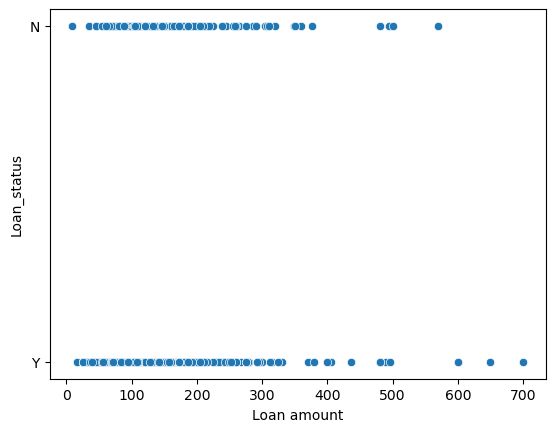

In [31]:
sns.scatterplot(x='Loan amount',y='Loan_status',data=df)

In [32]:
#checking for categorical columns
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print('Categorical columns:',cat_cols)

Categorical columns: ['Gender', 'married', 'Dependents', 'Education', 'Self employe', 'Property_Area ', 'Loan_status']


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [34]:
df.head()

,Gender,married,Dependents,Education,Self employe,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history,Property_Area,Loan_status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [35]:
df.tail()

,Gender,married,Dependents,Education,Self employe,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history,Property_Area,Loan_status
608,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
609,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
610,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
611,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
612,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [36]:
df.duplicated().sum()

0

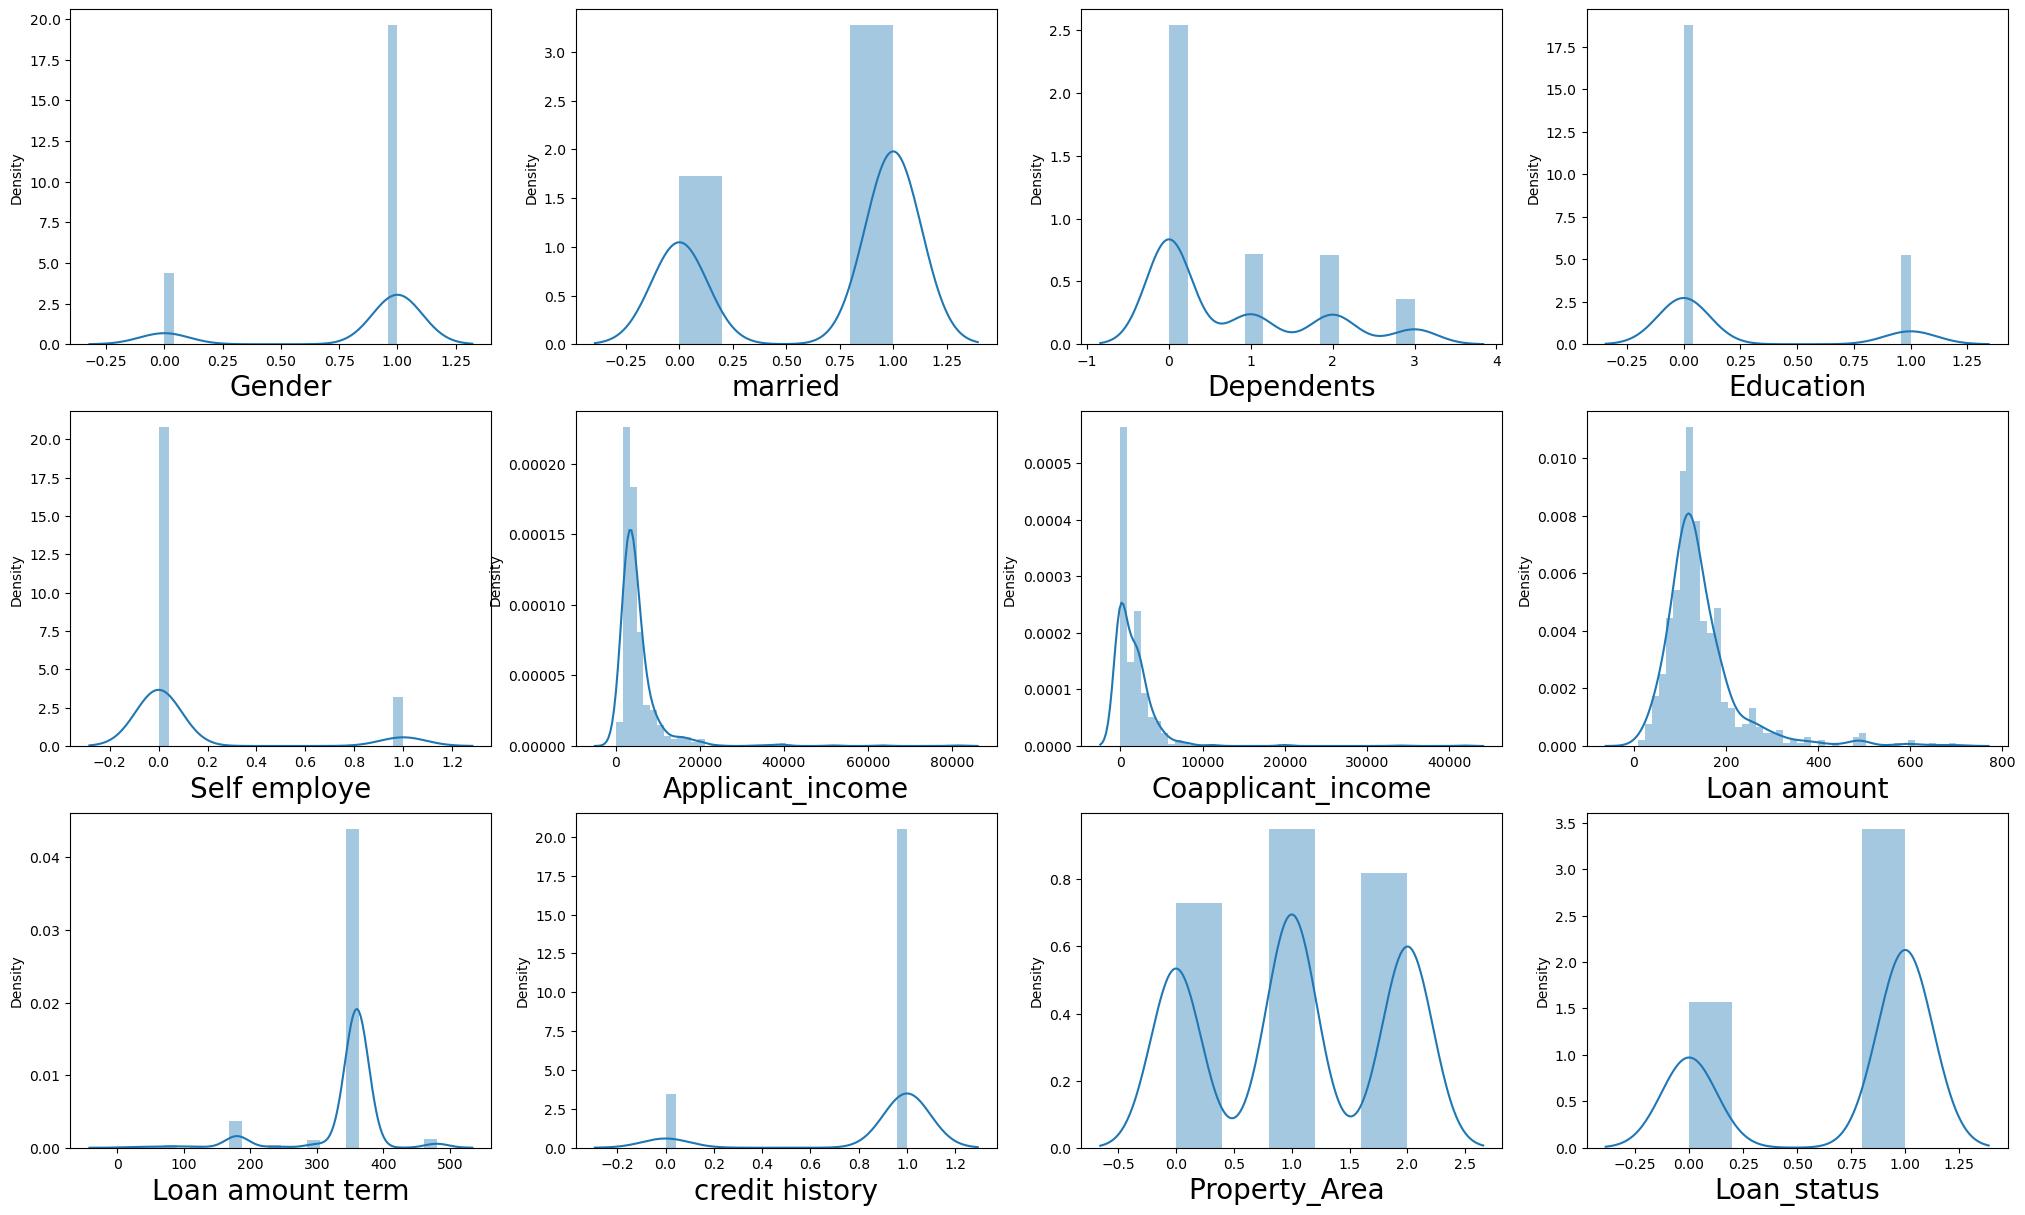

In [37]:
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df:
    if plotnumber <=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

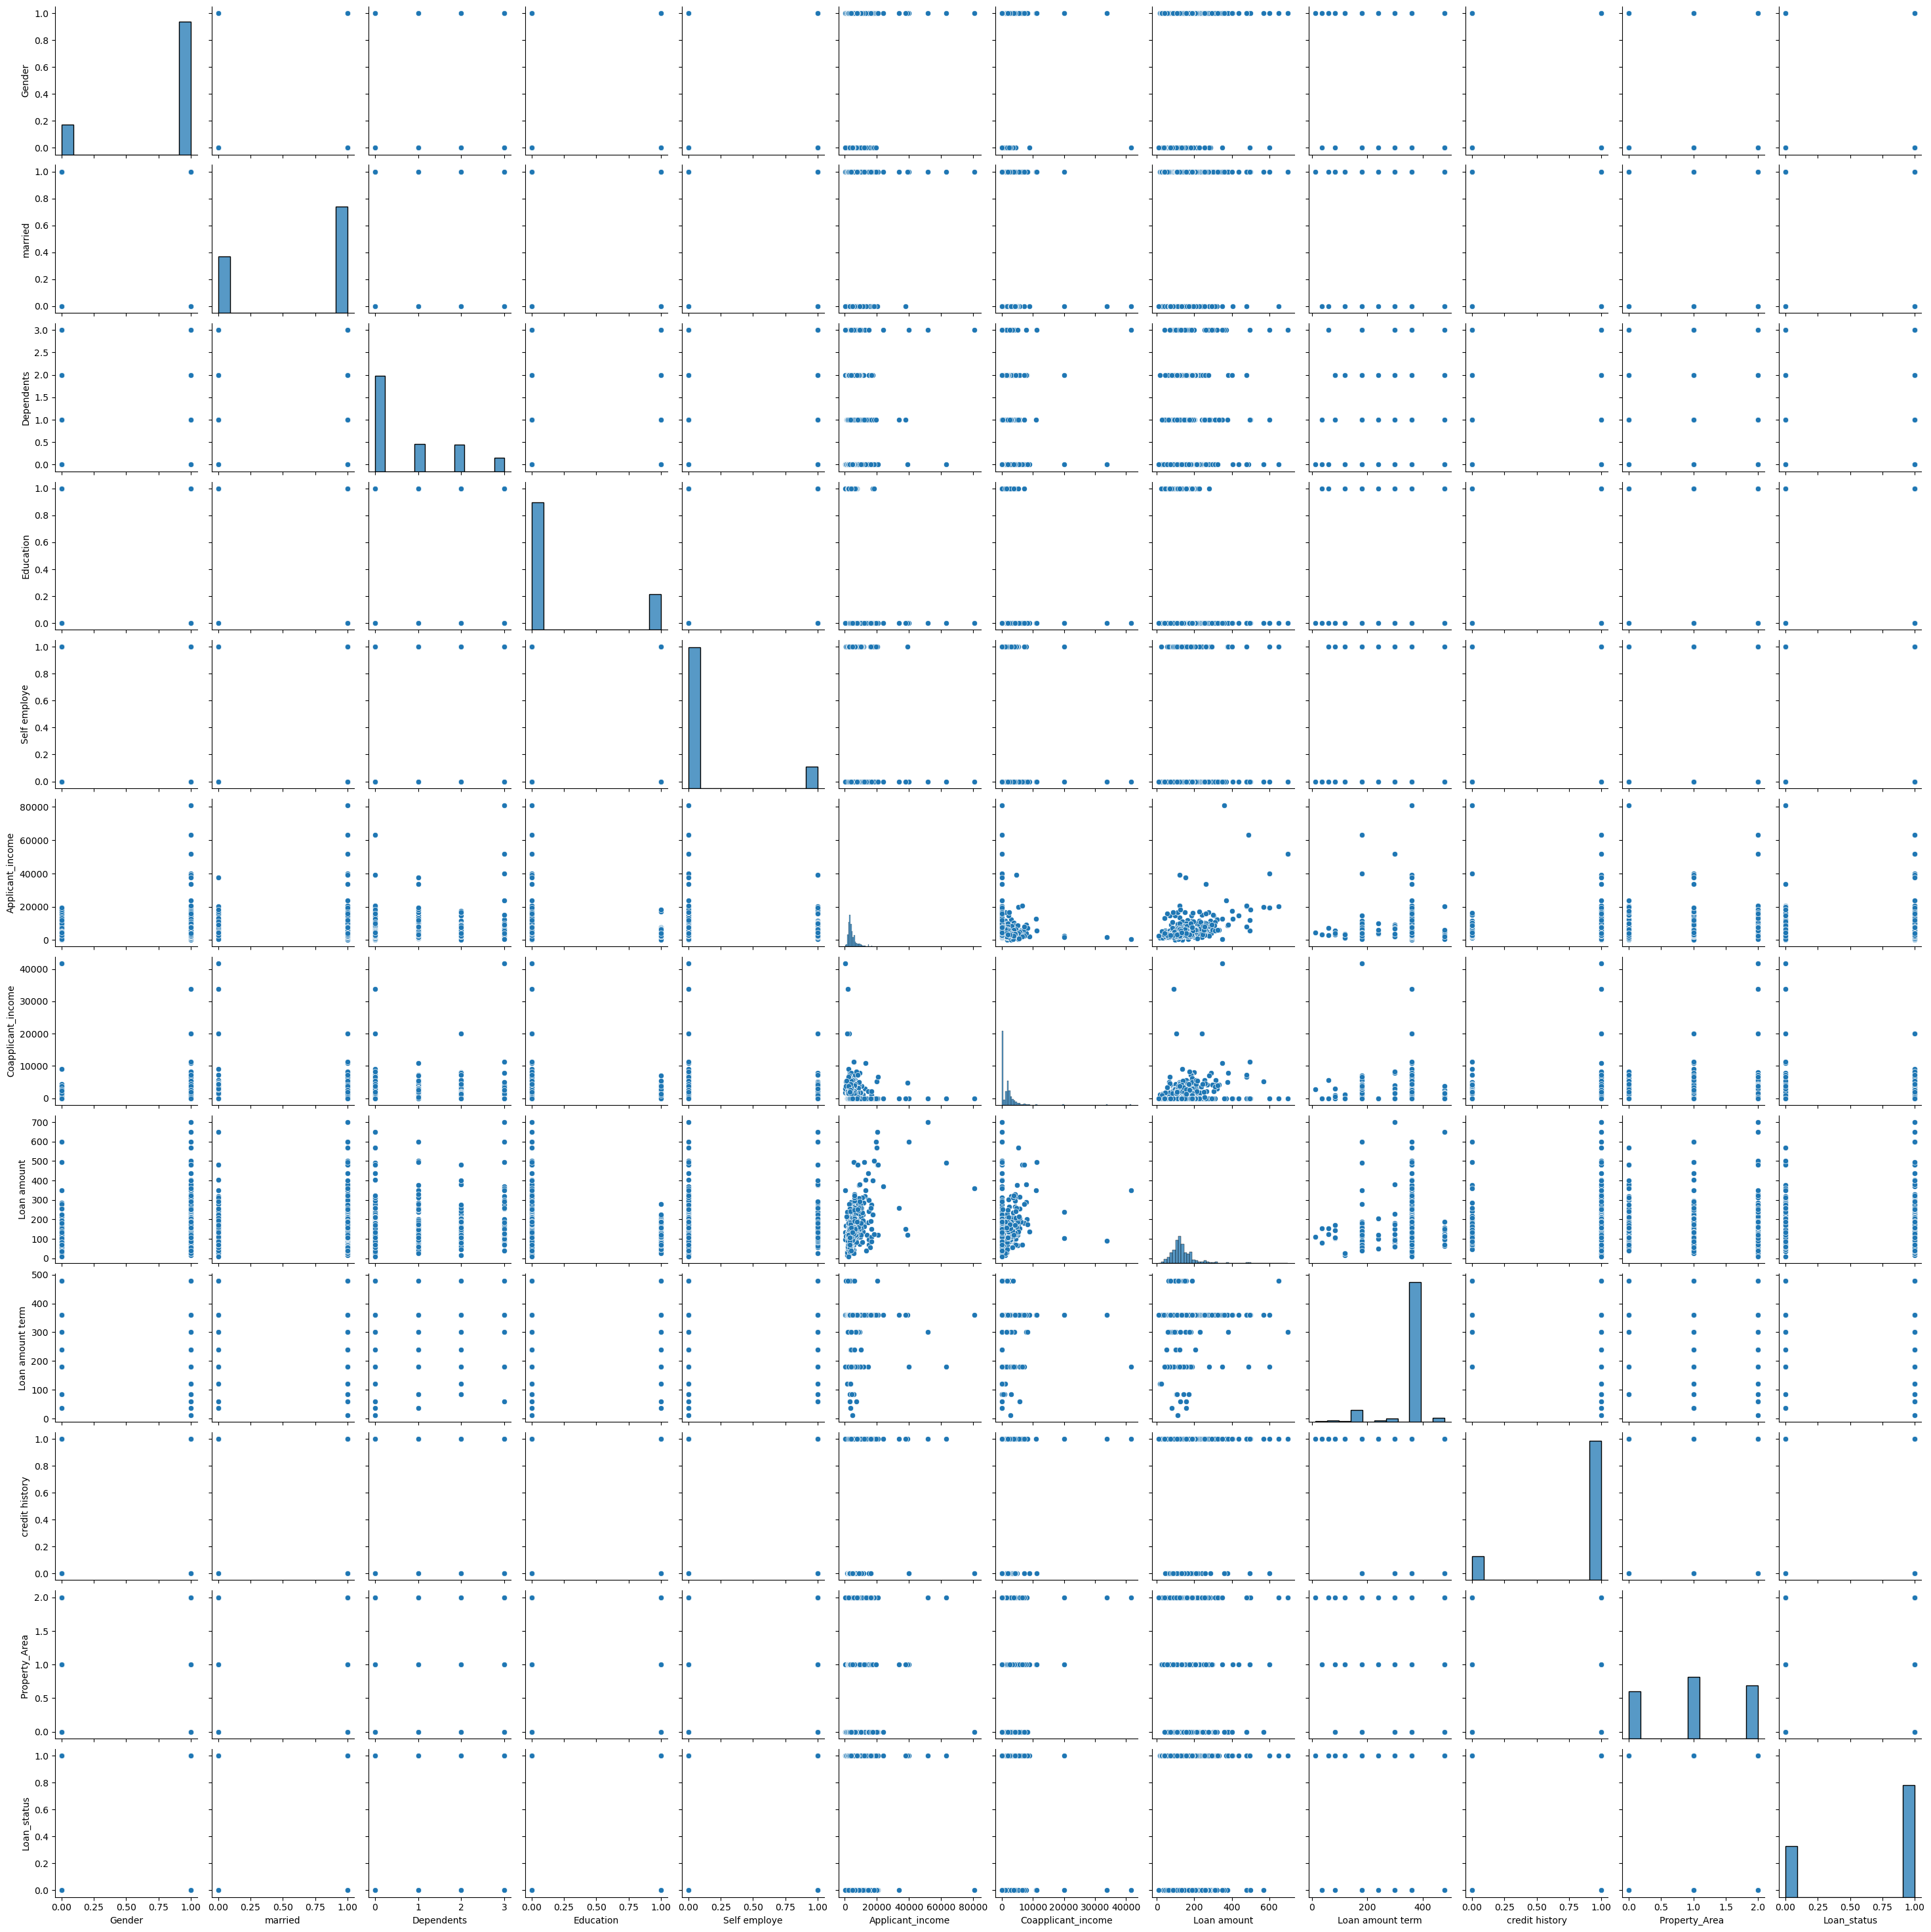

In [38]:
sns.pairplot(df)
plt.show()

# Checking for outliers

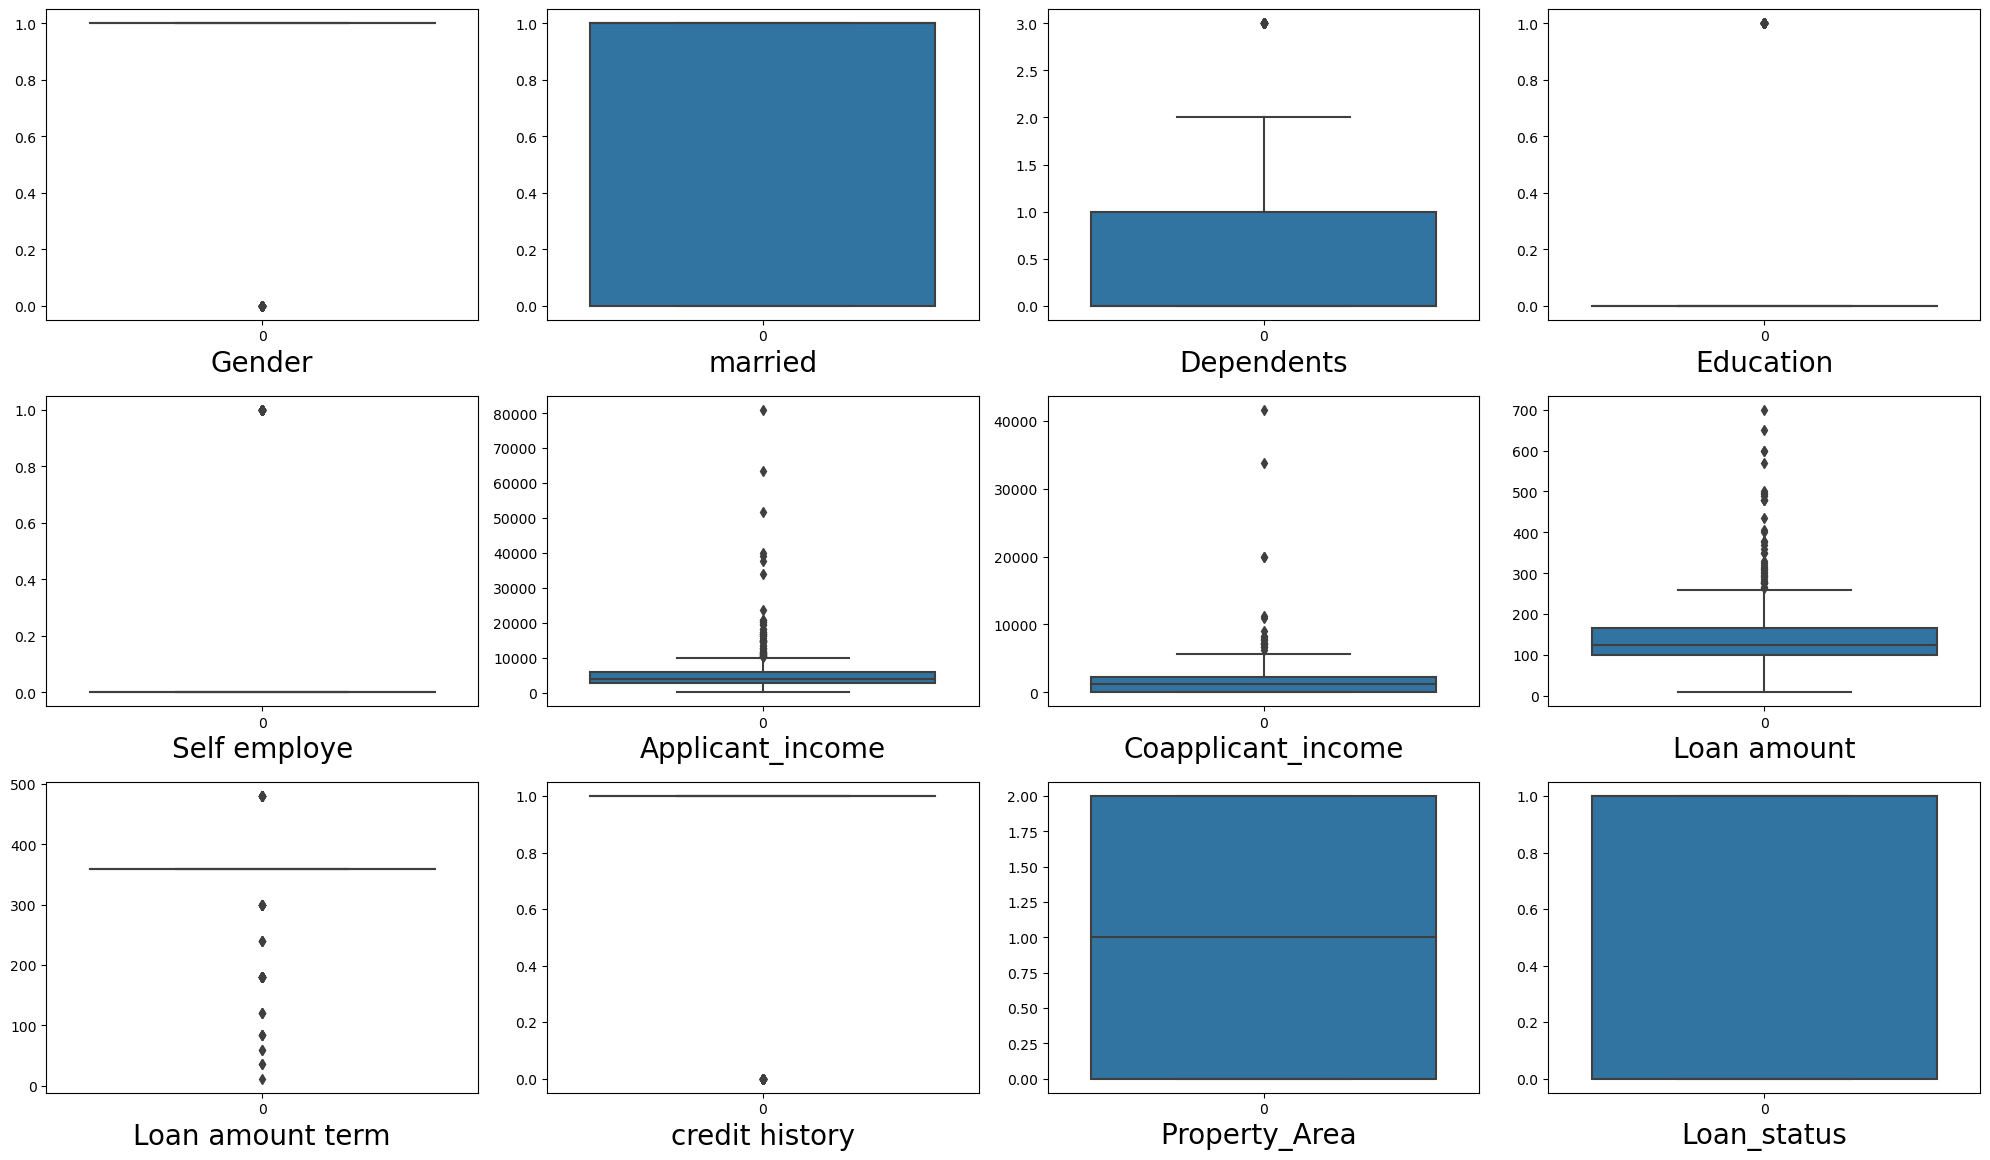

In [39]:
plt.figure(figsize=(20,15))
graph=1
for column in df:
    if graph<13:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()

By visualizing box plot outliers are present 

In [40]:
from scipy.stats import zscore
out_features=df[['Gender','Dependents','Education','Applicant_income','Coapplicant_income','Loan amount','Loan amount term','credit history']]
z=np.abs(zscore(out_features))
z

,Gender,Dependents,Education,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history
0,0.472814,0.252172,0.528913,0.134184,0.039614,0.207988,0.273471,0.412125
1,0.472814,0.738736,0.528913,0.393309,0.555079,0.944552,0.273471,0.412125
2,0.472814,0.738736,1.890668,0.461569,0.250933,0.303029,0.273471,0.412125
3,0.472814,0.738736,0.528913,0.097768,0.555079,0.053547,0.273471,0.412125
4,0.472814,1.243081,0.528913,0.002335,0.879199,1.443340,0.273471,0.412125
...,...,...,...,...,...,...,...,...
608,2.114997,0.738736,0.528913,0.409679,0.555079,0.885152,0.273471,0.412125
609,0.472814,2.233989,0.528913,0.212265,0.555079,1.253433,2.520488,0.412125
610,0.472814,0.252172,0.528913,0.436939,0.473042,1.277019,0.273471,0.412125
611,0.472814,1.243081,0.528913,0.356893,0.555079,0.492935,0.273471,0.412125


In [41]:
#thresold=3
np.where(z>3)

(array([  8,  13,  67,  93, 125, 129, 132, 154, 154, 170, 170, 176, 176,
        182, 184, 241, 261, 277, 307, 312, 332, 332, 368, 401, 408, 416,
        431, 442, 486, 494, 496, 505, 522, 524, 545, 560, 574, 580, 584,
        599, 603], dtype=int64),
 array([4, 6, 6, 6, 3, 5, 6, 3, 5, 3, 5, 4, 5, 3, 3, 6, 6, 5, 5, 6, 3, 5,
        5, 4, 3, 4, 5, 3, 5, 6, 6, 5, 5, 5, 6, 5, 6, 4, 6, 4, 5],
       dtype=int64))

In [42]:
df1=df[(z<3).all(axis=1)]
df1.shape

(576, 12)

In [43]:
print("old df",df.shape)
print("new df",df1.shape)

old df (613, 12)
new df (576, 12)


In [44]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 6.035889070146819


# Checking for skewness

In [45]:
df1.skew()

Gender               -1.620181
married              -0.635432
Dependents            1.049515
Education             1.303909
Self employe          2.249864
Applicant_income      2.149534
Coapplicant_income    1.348577
Loan amount           1.161276
Loan amount term     -2.096104
credit history       -1.973183
Property_Area        -0.052313
Loan_status          -0.819913
dtype: float64

 We have a maximum column as categorical, we need to check the skewness for continuous features: Loan amount & Total income.

In [46]:
df1['Loan amount']=np.cbrt(df1['Loan amount'])
df1['Applicant_income']=np.cbrt(df1['Applicant_income'])
df1['Coapplicant_income']=np.cbrt(df1['Coapplicant_income'])

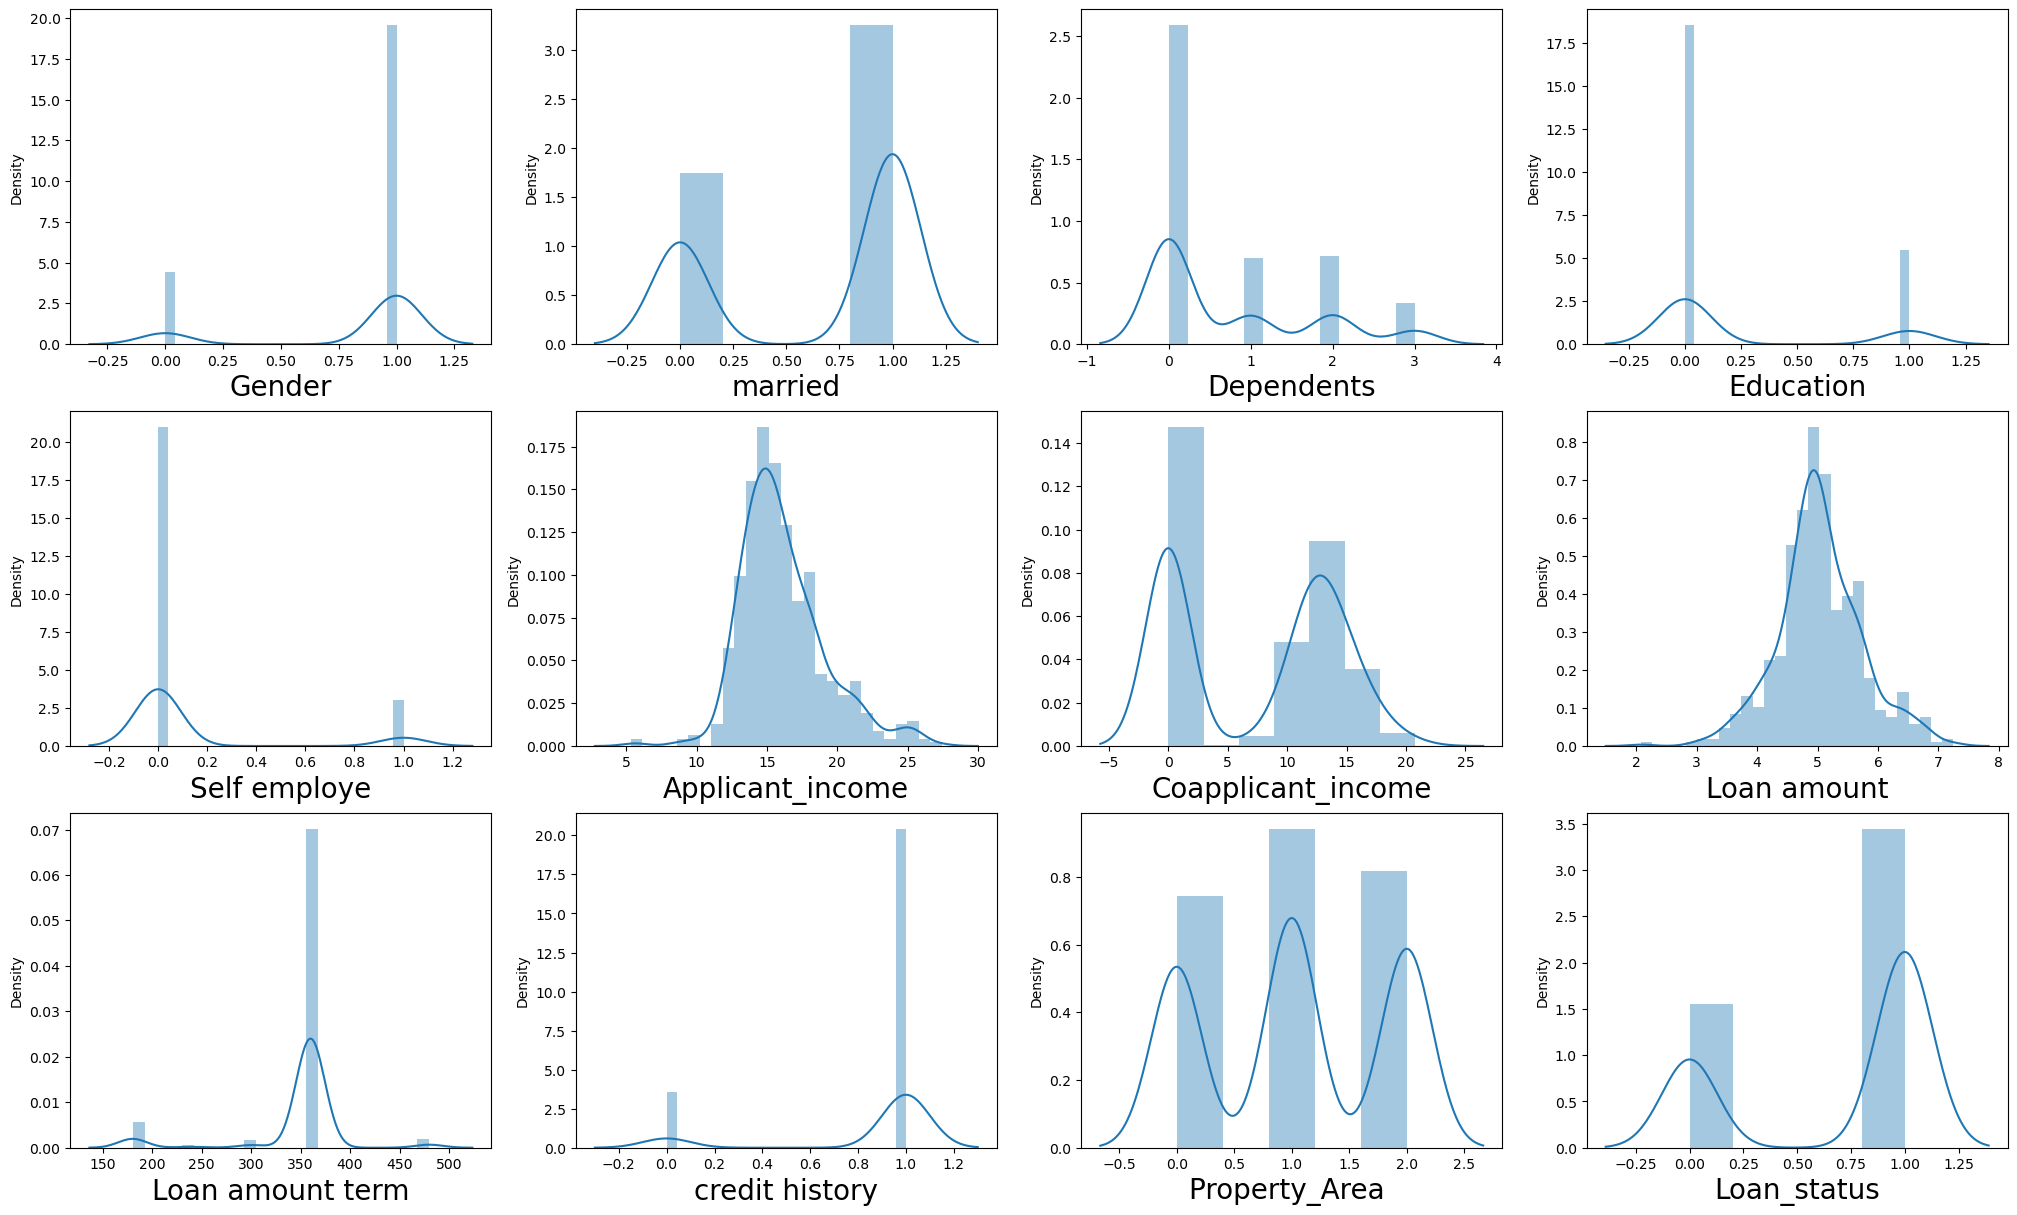

In [47]:
plt.figure(figsize = (25,20))
plotnumber = 1

for column in df1:
    if plotnumber <=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

# Corelation matrix

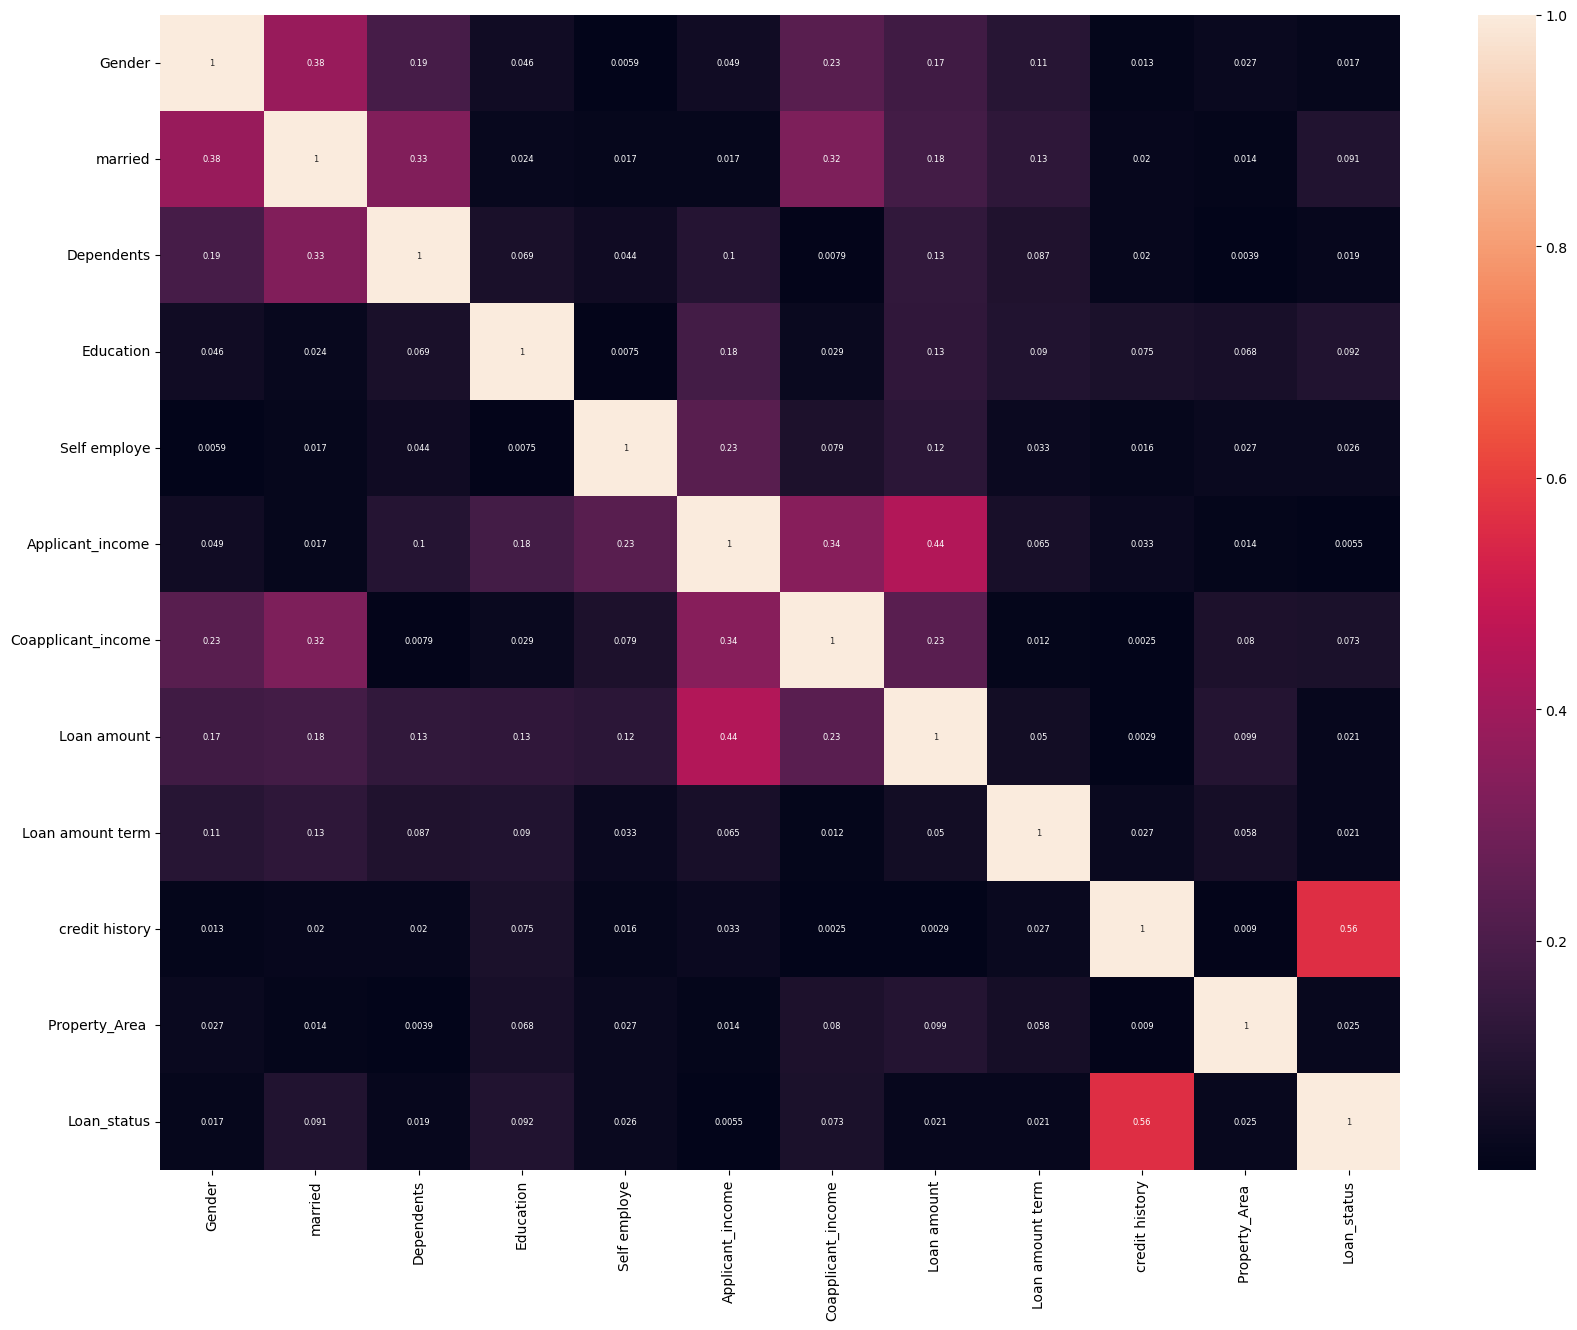

In [48]:
df1_corr=df1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df1_corr,annot=True,annot_kws={'size':6})
plt.show()

In [49]:
#Dividing data into Input X variables and Target Y variable
x = df1.drop(["Loan_status"],axis=1)
y= df1["Loan_status"]

In [50]:
x.shape,y.shape

((576, 11), (576,))

# Feature scaling using standard scalarization


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,married,Dependents,Education,Self employe,Applicant_income,Coapplicant_income,Loan amount,Loan amount term,credit history,Property_Area
0,0.477645,0.732120,0.280982,-0.542570,-0.380958,0.158348,0.594885,0.005407,0.231064,0.418939,-1.304968
1,0.477645,0.732120,-0.724269,-0.542570,2.624959,-0.565152,-1.095591,-1.427946,0.231064,0.418939,1.230147
2,0.477645,0.732120,-0.724269,1.843081,-0.380958,-0.797226,0.866518,-0.148574,0.231064,0.418939,1.230147
3,0.477645,-1.365896,-0.724269,-0.542570,-0.380958,0.674410,-1.095591,0.242485,0.231064,0.418939,1.230147
4,0.477645,0.732120,1.286233,-0.542570,2.624959,0.473132,1.282091,2.014643,0.231064,0.418939,1.230147
...,...,...,...,...,...,...,...,...,...,...,...
571,-2.093604,-1.365896,-0.724269,-0.542570,-0.380958,-0.618741,-1.095591,-1.284994,0.231064,0.418939,-1.304968
572,0.477645,0.732120,2.291483,-0.542570,-0.380958,-0.039227,-1.095591,-2.319859,-3.240923,0.418939,-1.304968
573,0.477645,0.732120,0.280982,-0.542570,-0.380958,1.298906,-0.179485,1.850163,0.231064,0.418939,1.230147
574,0.477645,0.732120,1.286233,-0.542570,-0.380958,1.162163,-1.095591,0.979876,0.231064,0.418939,1.230147


# Variance inflation factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.221573,Gender
1,1.401549,married
2,1.170747,Dependents
3,1.071170,Education
4,1.060958,Self employe
5,1.800068,Applicant_income
6,1.605020,Coapplicant_income
7,1.622513,Loan amount
8,1.057636,Loan amount term
9,1.009893,credit history


There is no multicolinearity By checking the vif values

# Finding the best RandomState

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.7687861271676301 at random state 1
Best accuracy is 0.8323699421965318 at random state 2
Best accuracy is 0.8439306358381503 at random state 11
Best accuracy is 0.861271676300578 at random state 46
Best accuracy is 0.884393063583815 at random state 167


# classification Algorithms

In [54]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 


# Random Forest classification model

In [55]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7687861271676301
[[ 29  31]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        60
           1       0.77      0.92      0.84       113

    accuracy                           0.77       173
   macro avg       0.77      0.70      0.72       173
weighted avg       0.77      0.77      0.75       173



# ExtraTreesClassifier


In [56]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7514450867052023
[[ 29  31]
 [ 12 101]]
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        60
           1       0.77      0.89      0.82       113

    accuracy                           0.75       173
   macro avg       0.74      0.69      0.70       173
weighted avg       0.75      0.75      0.74       173



# logisticRegression

In [57]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7976878612716763
[[ 26  34]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.60        60
           1       0.77      0.99      0.86       113

    accuracy                           0.80       173
   macro avg       0.87      0.71      0.73       173
weighted avg       0.84      0.80      0.77       173



# SVC

In [58]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8034682080924855
[[ 27  33]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.61        60
           1       0.77      0.99      0.87       113

    accuracy                           0.80       173
   macro avg       0.87      0.72      0.74       173
weighted avg       0.84      0.80      0.78       173



# Bagging Classifier

In [59]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.6878612716763006
[[28 32]
 [22 91]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        60
           1       0.74      0.81      0.77       113

    accuracy                           0.69       173
   macro avg       0.65      0.64      0.64       173
weighted avg       0.68      0.69      0.68       173



# Decision Tree

In [60]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.6820809248554913
[[34 26]
 [29 84]]
              precision    recall  f1-score   support

           0       0.54      0.57      0.55        60
           1       0.76      0.74      0.75       113

    accuracy                           0.68       173
   macro avg       0.65      0.66      0.65       173
weighted avg       0.69      0.68      0.68       173



# KNN classifier

In [61]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7572254335260116
[[ 26  34]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.76      0.43      0.55        60
           1       0.76      0.93      0.83       113

    accuracy                           0.76       173
   macro avg       0.76      0.68      0.69       173
weighted avg       0.76      0.76      0.74       173



# Cross validation

In [62]:
#cross validation for Extratree classifier
score1=cross_val_score(ET,x,y)
print("score1")
print(score1.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predET)-score1.mean())

score1
0.7743028485757122
Diff between acc_score and cross validation- -0.02285776187050992


In [63]:
#cross validation for random forest classifier
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.800344827586207
Diff between acc_score and cross validation- -0.03155870041857689


In [64]:
#cross validarion for logistic regreesion
score2=cross_val_score(LR,x,y)
print("score2")
print(score2.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score2.mean())

score2
0.8159820089955021
Diff between acc_score and cross validation- -0.01829414772382576


In [65]:
#cross validation for decision trees
score4=cross_val_score(DT,x,y)
print("score4")
print(score4.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predDT)-score4.mean())

score4
0.7170014992503748
Diff between acc_score and cross validation- -0.0349205743948835


In [66]:
#cross validation for Bagging classifier
score5=cross_val_score(BC,x,y)
print("score5")
print(score5.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predBC)-score5.mean())

score5
0.7534182908545727
Diff between acc_score and cross validation- -0.06555701917827206


In [67]:
#cross validation for SVM
score6=cross_val_score(svc,x,y)
print("score6")
print(score6.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predsvc)-score6.mean())

score6
0.8177061469265368
Diff between acc_score and cross validation- -0.014237938834051223


Iam selectiong SVM classifier for model building,the diff between acc score and cross validation is less.

Model Building

# Hyper parameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  

In [69]:
grid = GridSearchCV(SVC(), params, refit = True, verbose = 3) 


In [70]:
# fitting the model for grid searchcv
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [71]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [72]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=1, gamma=0.1)


In [73]:
Final_model=SVC(C=1,gamma=0.1,kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.34682080924856


Lets check auc for best model hyper parameter tuning

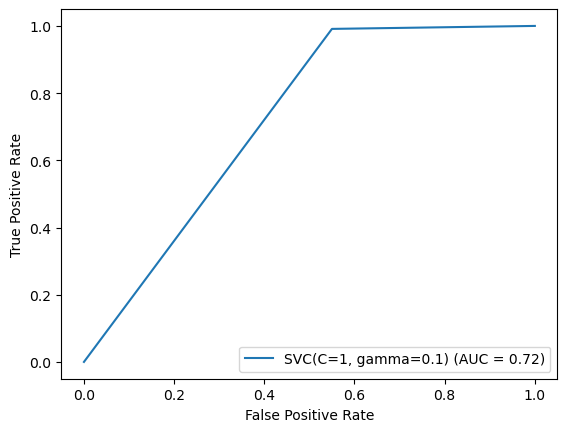

In [74]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Saving the model

In [75]:
import joblib
joblib.dump(Final_model,"Loan application status.pkl")

['Loan application status.pkl']

In [76]:
model=joblib.load("Loan application status.pkl")
prediction=model.predict(x_test)

In [77]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,1,1
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
168,1,1
169,1,1
170,1,1
171,1,1
